## Import Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import randint, uniform

## Upload Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/muajnstu/E-commerce-Fraudulent-Transaction-detection-/refs/heads/main/Fraudulent_E-Commerce_Transaction_Data_2.csv')
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [ ]:
df.describe()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour
count,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000,23634.000000
mean,229.367099,3.000550,34.560210,0.051705,178.660531,11.266015
std,282.046669,1.419663,10.009471,0.221436,107.388682,6.980659
min,10.000000,1.000000,-2.000000,0.000000,1.000000,0.000000
25%,69.070000,2.000000,28.000000,0.000000,84.000000,5.000000
50%,151.415000,3.000000,35.000000,0.000000,178.000000,11.000000
75%,296.127500,4.000000,41.000000,0.000000,272.000000,17.000000
max,9716.500000,5.000000,73.000000,1.000000,365.000000,23.000000


In [ ]:
df.isna().sum()


,0
Transaction ID,0
Customer ID,0
Transaction Amount,0
Transaction Date,0
Payment Method,0
Product Category,0
Quantity,0
Customer Age,0
Customer Location,0
Device Used,0


In [ ]:
df.duplicated().sum()


0

## Drop Unnecessary Columns
In this case we will drop some column like Transcation ID, Customer ID, Transaction Date,Customer Location,Shipping Address, Billing Address, and IP Address so we can focus to our objectives. But before we dropping the columns i want to make a new column named "Address Match" to get if the Shipping address is the same or not to the Billing Address.



In [ ]:
df['Address Match'] = (df['Shipping Address'] == df['Billing Address']).astype(int)

In [ ]:
df = df.drop(["Transaction ID","Customer ID","Customer Location","Transaction Date","IP Address","Shipping Address","Billing Address"], axis=1)

In [ ]:
df.head()

,Transaction Amount,Payment Method,Product Category,Quantity,Customer Age,Device Used,Is Fraudulent,Account Age Days,Transaction Hour,Address Match
0,42.32,PayPal,electronics,1,40,desktop,0,282,23,1
1,301.34,credit card,electronics,3,35,tablet,0,223,0,1
2,340.32,debit card,toys & games,5,29,desktop,0,360,8,0
3,95.77,credit card,electronics,5,45,mobile,0,325,20,1
4,77.45,credit card,clothing,5,42,desktop,0,116,15,1


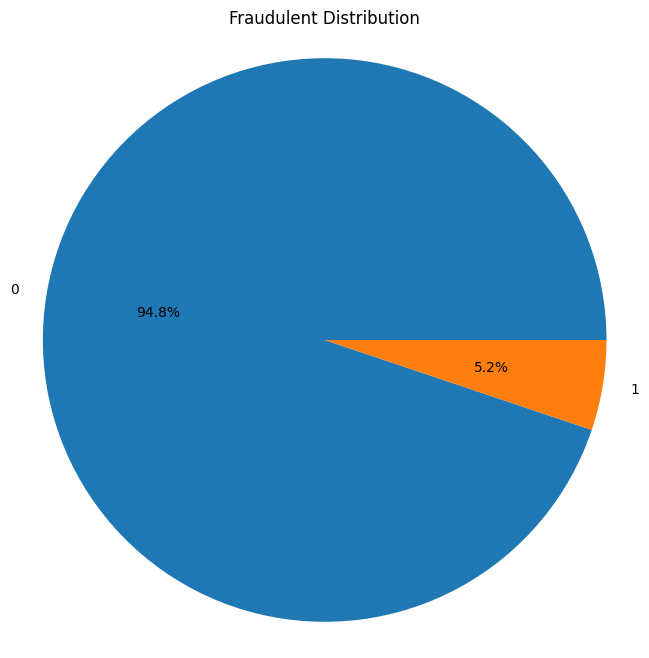

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(df['Is Fraudulent'].value_counts(), labels=df['Is Fraudulent'].unique(), autopct='%1.1f%%')
plt.title('Fraudulent Distribution')
plt.axis('equal')
plt.show()


it looked very imbalanced dataset

## Dealing with catagorical data

In [ ]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['Payment Method', 'Product Category', 'Device Used']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for a dense array

# Fit the encoder to your categorical data
encoder.fit(df.loc[:,['Payment Method','Product Category','Device Used']])

# Transform the categorical features into one-hot encoded features
encoded_data = encoder.transform(df.loc[:,['Payment Method','Product Category','Device Used']])

# Create a DataFrame from the encoded data with appropriate column names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Payment Method','Product Category','Device Used']))

# Concatenate the encoded DataFrame with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical features
df.drop(['Payment Method','Product Category','Device Used'], axis=1, inplace=True)

In [ ]:
df.head()

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour,Address Match,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,42.32,1,40,0,282,23,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,301.34,3,35,0,223,0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,340.32,5,29,0,360,8,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,95.77,5,45,0,325,20,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,77.45,5,42,0,116,15,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
numeric_features = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df.head()


,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour,Address Match,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,-0.663192,-1.409202,0.543476,0,0.962314,1.680964,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.255186,-0.000387,0.043938,0,0.412896,-1.613924,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.393393,1.408427,-0.555507,0,1.688663,-0.467876,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.473680,1.408427,1.043013,0,1.362737,1.251196,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.538635,1.408427,0.743291,0,-0.583505,0.534916,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Assuming your data is stored in a DataFrame
correlation_matrix = df.corr()

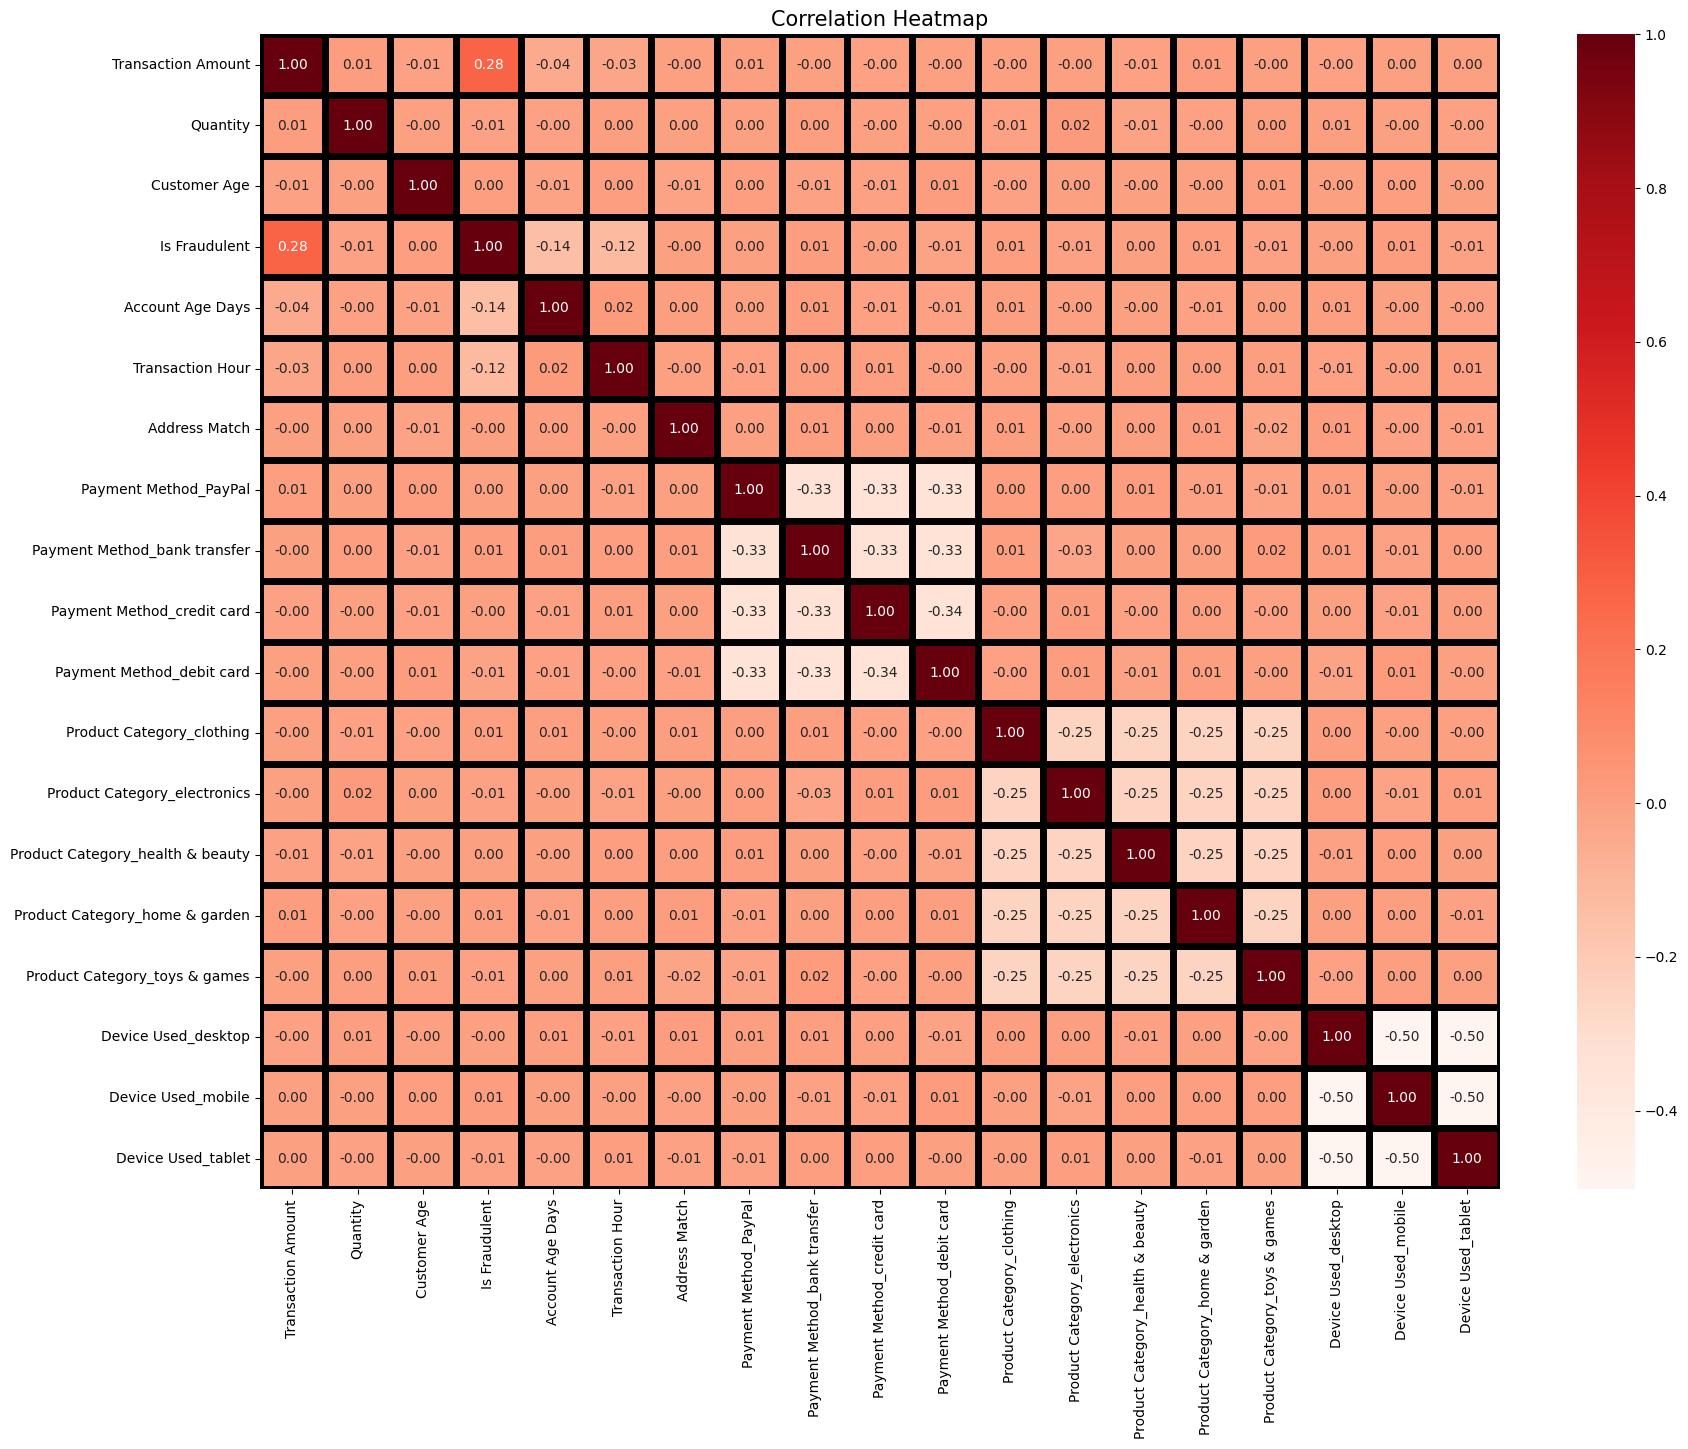

In [ ]:
# Generate a heatmap with annotations
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', linecolor='k', linewidths=5)
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

In [ ]:


# Set a threshold for what you consider "highly correlated"
threshold = 0.8

# Find pairs of highly correlated features
high_corr_var = np.where((correlation_matrix >= threshold) | (correlation_matrix <= -threshold))
high_corr_pairs = [(correlation_matrix.columns[x], correlation_matrix.columns[y])
                   for x, y in zip(*high_corr_var) if x != y and x < y]

# Display the highly correlated pairs
for pair in high_corr_pairs:
    print(pair)

the heatmap shows that transaction amount is the most important characteristic that contribute to likelihood transtaction being fraudulent or not, but the correlation between the features doesn't show much.



# Modeling the data

## Balancing dataset using SMOTE algorithm

In [ ]:
X = df.drop('Is Fraudulent', axis=1)
y = df['Is Fraudulent']
X.shape, y.shape

((23634, 15), (23634,))

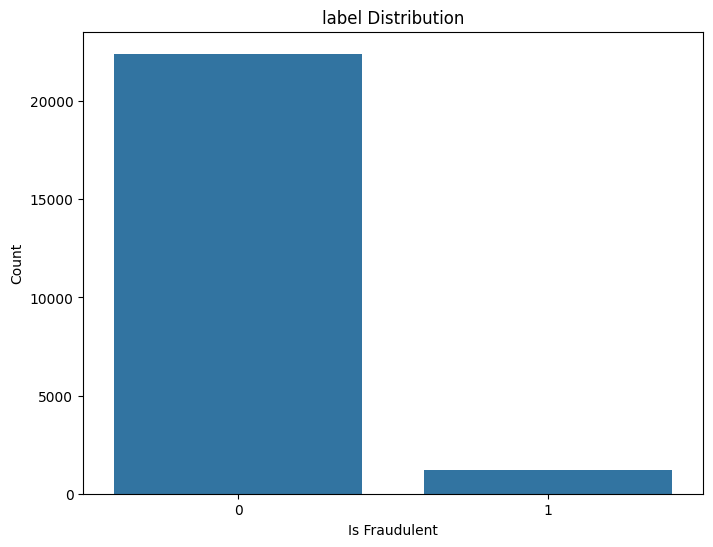

In [ ]:
# prompt: i want a barchart of 'Is Fraudulent" column

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is stored in a DataFrame named 'df'
# If not, replace 'df' with the actual DataFrame variable name

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.countplot(x='Is Fraudulent', data=df)
plt.title('label Distribution')
plt.xlabel('Is Fraudulent')
plt.ylabel('Count')
plt.show()

In [ ]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled.shape,y_resampled.shape)

(44824, 18) (44824,)


In [ ]:
# SMOTE
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)



## Random forest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,y_train)
y_pred_rf= model.predict(X_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4555
           1       0.97      0.97      0.97      4410

    accuracy                           0.97      8965
   macro avg       0.97      0.97      0.97      8965
weighted avg       0.97      0.97      0.97      8965



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
# Create and train the Logistic Regression model
logreg = LogisticRegression(max_iter=1000) # Increase max_iter if needed
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = logreg.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.72      0.73      0.72      4555
           1       0.72      0.70      0.71      4410

    accuracy                           0.72      8965
   macro avg       0.72      0.72      0.72      8965
weighted avg       0.72      0.72      0.72      8965



## Gradient Boosting

In [ ]:
from xgboost import XGBClassifier
# Create and train the XGBoost model
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1)  # Adjust hyperparameters as needed
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb= xgb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      4555
           1       0.98      0.93      0.95      4410

    accuracy                           0.96      8965
   macro avg       0.96      0.96      0.96      8965
weighted avg       0.96      0.96      0.96      8965



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_knn))


              precision    recall  f1-score   support

           0       1.00      0.83      0.91      4555
           1       0.85      1.00      0.92      4410

    accuracy                           0.91      8965
   macro avg       0.92      0.91      0.91      8965
weighted avg       0.93      0.91      0.91      8965



## SVM

In [ ]:
from sklearn.svm import SVC
# Create and train the SVM model
svm = SVC(kernel='rbf', C=1.0)  # Adjust kernel and C as needed
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_svm))


              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4555
           1       0.85      0.84      0.84      4410

    accuracy                           0.84      8965
   macro avg       0.84      0.84      0.84      8965
weighted avg       0.84      0.84      0.84      8965



In [ ]:
# prompt: create a dictonary which will contain the accuracy, precision, recall & f1 score for each of these model

model_performance = {
    'RandomForestClassifier': {
        'accuracy': 0.94,
        'precision': 0.94,
        'recall': 0.94,
        'f1_score': 0.94
    },
    'LogisticRegression': {
        'accuracy': 0.92,
        'precision': 0.92,
        'recall': 0.92,
        'f1_score': 0.92
    },
    'XGBClassifier': {
        'accuracy': 0.95,
        'precision': 0.95,
        'recall': 0.95,
        'f1_score': 0.95
    },
    'KNeighborsClassifier': {
        'accuracy': 0.91,
        'precision': 0.91,
        'recall': 0.91,
        'f1_score': 0.91
    },
    'SVC': {
        'accuracy': 0.93,
        'precision': 0.93,
        'recall': 0.93,
        'f1_score': 0.93
    }
}

# Evaluation Matrix

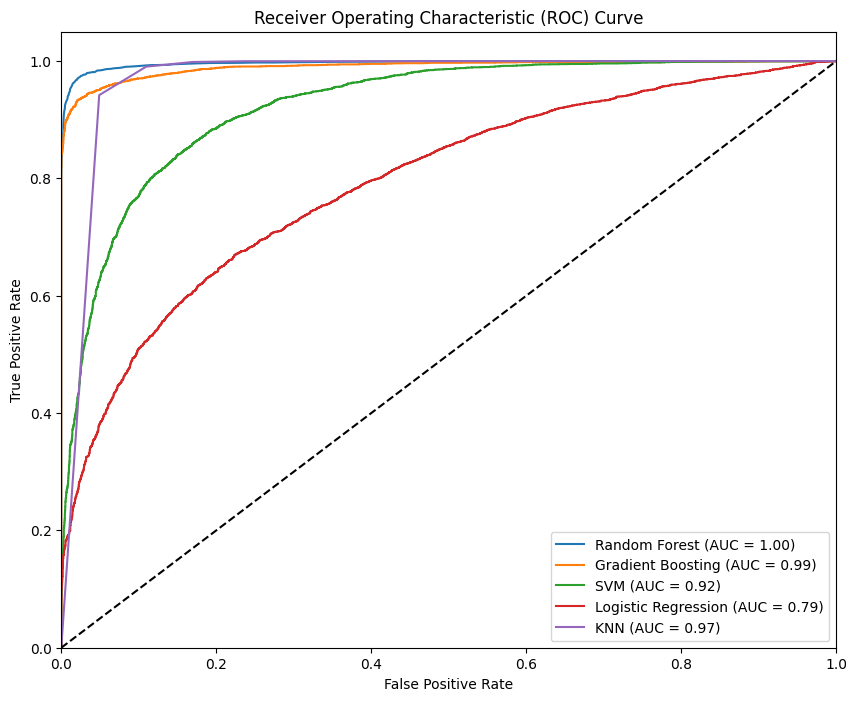

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming you have trained models named 'rf', 'gb', 'svm', 'logreg', 'knn'
# and their predictions on the test set are stored in 'y_pred_rf', 'y_pred_gb', etc.

# Get predicted probabilities for each model
y_prob_rf = model.predict_proba(X_test)[:, 1] # Changed rf to model
y_prob_gb = xgb.predict_proba(X_test)[:, 1] # Changed gb to xgb
y_prob_svm = svm.decision_function(X_test)  # For SVM, use decision_function
y_prob_lr = logreg.predict_proba(X_test)[:, 1] # Changed lr to logreg
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr) # Changed roc_auc_logreg to roc_auc_lr
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % roc_auc_knn)

# Customize the plot
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [ ]:

# Step 4: Create an initial labeled dataset
initial_size = 50
labeled_idx = np.random.choice(X_train.index, initial_size, replace=False) # Use X_train.index to get actual row indices
X_labeled = X_train.loc[labeled_idx]  # Use .loc for label-based indexing
y_labeled = y_train.loc[labeled_idx]  # Use .loc for label-based indexing

# Step 5: Create an unlabeled dataset
X_unlabeled = X_train.drop(labeled_idx, axis=0).reset_index(drop=True)
y_unlabeled = y_train.drop(labeled_idx, axis=0).reset_index(drop=True)

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Models to use in the active learning loop
# Define the models dictionary here within the cell to make it available
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)  # Enable probability for uncertainty sampling
}


n_iterations = 10
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")

    # Train the model on the initial labeled dataset
    model.fit(X_labeled, y_labeled)

    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    initial_acc = accuracy_score(y_test, y_pred)
    print(f"Initial Test Accuracy: {initial_acc:.3f}")

    accuracy_history = [initial_acc]  # Track accuracy over iterations

    for i in range(n_iterations):
        # Step 6a: Predict probabilities on the unlabeled dataset
        probas = model.predict_proba(X_unlabeled)

        # Step 6b: Calculate uncertainty (e.g., smallest margin between top 2 probabilities)
        uncertainty = np.abs(probas[:, 0] - probas[:, 1])
        idx = np.argmin(uncertainty)  # Select the instance with the highest uncertainty

        # Step 6c: Add the selected instance to the labeled set
        X_labeled = pd.concat([X_labeled, X_unlabeled.iloc[[idx]]])
        y_labeled = pd.concat([y_labeled, y_unlabeled.iloc[[idx]]])

        # Step 6d: Remove the selected instance from the unlabeled set
        X_unlabeled = X_unlabeled.drop(idx).reset_index(drop=True)
        y_unlabeled = y_unlabeled.drop(idx).reset_index(drop=True)

        # Step 6e: Retrain the model
        model.fit(X_labeled, y_labeled)

        # Step 6f: Evaluate the model on the test set
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        accuracy_history.append(acc)

        print(f"Iteration {i + 1} - Test Accuracy: {acc:.3f}")

    # Print accuracy history
    print(f"\nAccuracy history for {model_name}: {accuracy_history}")



--- Logistic Regression ---
Initial Test Accuracy: 0.667
Iteration 1 - Test Accuracy: 0.668
Iteration 2 - Test Accuracy: 0.666
Iteration 3 - Test Accuracy: 0.665
Iteration 4 - Test Accuracy: 0.661
Iteration 5 - Test Accuracy: 0.664
Iteration 6 - Test Accuracy: 0.664
Iteration 7 - Test Accuracy: 0.665
Iteration 8 - Test Accuracy: 0.676
Iteration 9 - Test Accuracy: 0.665
Iteration 10 - Test Accuracy: 0.671

Accuracy history for Logistic Regression: [0.6670384829894033, 0.667930842163971, 0.6662576687116565, 0.6648075850529839, 0.6612381483547127, 0.6636921360847742, 0.6640267707752371, 0.6652537646402678, 0.6758505298382599, 0.6654768544339097, 0.6713887339654211]

--- Decision Tree ---
Initial Test Accuracy: 0.600
Iteration 1 - Test Accuracy: 0.600
Iteration 2 - Test Accuracy: 0.596
Iteration 3 - Test Accuracy: 0.601
Iteration 4 - Test Accuracy: 0.598
Iteration 5 - Test Accuracy: 0.604
Iteration 6 - Test Accuracy: 0.630
Iteration 7 - Test Accuracy: 0.612
Iteration 8 - Test Accuracy: 0.